In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [125]:
dataset = pd.read_csv(r'E:\FlipRobo Technologies\Micro Credit Project\Data file.csv')
dataset

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111670  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228330  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       20-07-2016  
1       10-08-2016  
2       19-08-2016  
3       06-06-2016  
4       22-06-2016  
...            ...  
209588  17-06-2016  
209589  12-06-2016  
209590  29-07-2016  
209591  25-07-2016  
209592  07-07-2016  

[209593 rows x 37 columns]

In [126]:
dataset.shape

(209593, 37)

In [127]:
dataset = dataset.drop(dataset.columns[0],axis =1)

In [128]:
dataset.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [129]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [130]:
dataset.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755200  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000       209593.00000      209593.000000   
mean     2692.581910    3483.406534         3755.84780        3712.202921   
std      4308.586781    5770.461279        53905.89223       53374.833430   
min    -23737.140000  -24720.580000          -29.00000         -29.000000   
25%       280.420000     300.260000            1.00000           0.000000   
50%      1083.570000    1334.000000            3.00000           0.000000   
75%      3356.940000    4201.790000            7.00000           0.000000   
max    198926.110000  200148.110000       998650.37770      999171.809400   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count     209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        2064.452797       3.978057  ...       2.758981      17.952021   
std         2370.786034       4.256090  ...       2.554502      17.379741   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       4.000000      24.000000   
max        55000.000000     203.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560860            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 33 columns]

In [131]:
dataset['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

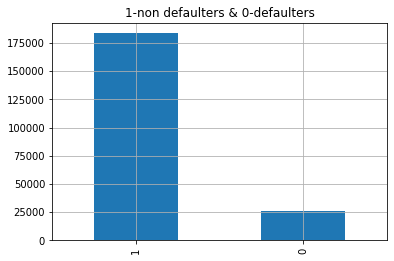

In [132]:
# label -  Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

dataset['label'].value_counts().plot(kind = 'bar',title ='1-non defaulters & 0-defaulters',grid = True)

In [133]:
# pcircle -	telecom circle

dataset['pcircle'].unique()

array(['UPW'], dtype=object)

In [134]:
dataset['pcircle'] = dataset['pcircle'].replace('UPW',1)

In [135]:
dataset['label'].unique()

array([0, 1], dtype=int64)

In [136]:
dataset

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
0           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
1           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
2           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
3           1  55773I70781   241.0     21.228000     21.228000    159.42   
4           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      1  28556I85350  1013.0  11843.111670  11904.350000   5861.83   
209591      1  59712I82733  1732.0  12488.228330  12574.370000    411.83   
209592      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000        1   
1                    12                 0.0   0.000000   0.000000        1   
2                     6                 0.0   0.000000   0.000000        1   
3                     6                 0.0   0.000000   0.000000        1   
4                     6                 0.0   2.333333   2.333333        1   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000        1   
209589                6                 0.0   1.000000   1.000000        1   
209590               12                 0.0   4.000000   3.833333        1   
209591               12                 0.0   0.000000  10.500000        1   
209592               12                 0.0   0.000000   0.000000        1   

             pdate  
0       20-07-2016  
1       10-08-2016  
2       19-08-2016  
3       06-06-2016  
4       22-06-2016  
...            ...  
209588  17-06-2016  
209589  12-06-2016  
209590  29-07-2016  
209591  25-07-2016  
209592  07-07-2016  

[209593 rows x 36 columns]

In [137]:
import datetime
dataset['pdate2']= pd.to_datetime(dataset['pdate'])

In [138]:
dataset

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
0           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
1           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
2           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
3           1  55773I70781   241.0     21.228000     21.228000    159.42   
4           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      1  28556I85350  1013.0  11843.111670  11904.350000   5861.83   
209591      1  59712I82733  1732.0  12488.228330  12574.370000    411.83   
209592      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                      0.0          2.0            12                6   
1                      0.0          1.0            12               12   
2                      0.0          1.0             6                6   
3                      0.0          2.0            12                6   
4                      0.0          7.0            42                6   
...                    ...          ...           ...              ...   
209588                 0.0          2.0            12                6   
209589                 0.0          3.0            18                6   
209590                 0.0          6.0            54               12   
209591                 0.0          3.0            24               12   
209592                 0.0          2.0            18               12   

        medianamnt_loans90  payback30  payback90  pcircle       pdate  \
0                      0.0  29.000000  29.000000        1  20-07-2016   
1                      0.0   0.000000   0.000000        1  10-08-2016   
2                      0.0   0.000000   0.000000        1  19-08-2016   
3                      0.0   0.000000   0.000000        1  06-06-2016   
4                      0.0   2.333333   2.333333        1  22-06-2016   
...                    ...        ...        ...      ...         ...   
209588                 0.0   1.000000   1.000000        1  17-06-2016   
209589                 0.0   1.000000   1.000000        1  12-06-2016   
209590                 0.0   4.000000   3.833333        1  29-07-2016   
209591                 0.0   0.000000  10.500000        1  25-07-2016   
209592                 0.0   0.000000   0.000000        1  07-07-2016   

           pdate2  
0      2016-07-20  
1      2016-10-08  
2      2016-08-19  
3      2016-06-06  
4      2016-06-22  
...           ...  
209588 2016-06-17  
209589 2016-12-06  
209590 2016-07-29  
209591 2016-07-25  
209592 2016-07-07  

[209593 rows x 37 columns]

In [139]:
dataset['year'] = dataset['pdate2'].dt.year

In [140]:
dataset['month'] = dataset['pdate2'].dt.month

In [141]:
dataset['date'] = dataset['pdate2'].dt.day

In [142]:
dataset.drop(['pdate','pdate2'],axis ='columns',inplace = True)

In [143]:
dataset['pcircle'].dtypes

dtype('int64')

In [144]:
# msisdn -	mobile number of user

dataset1 = dataset.drop('msisdn',axis =1)

In [145]:
dataset

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
0           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
1           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
2           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
3           1  55773I70781   241.0     21.228000     21.228000    159.42   
4           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      1  28556I85350  1013.0  11843.111670  11904.350000   5861.83   
209591      1  59712I82733  1732.0  12488.228330  12574.370000    411.83   
209592      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0               2.0            12                6                 0.0   
1               1.0            12               12                 0.0   
2               1.0             6                6                 0.0   
3               2.0            12                6                 0.0   
4               7.0            42                6                 0.0   
...             ...           ...              ...                 ...   
209588          2.0            12                6                 0.0   
209589          3.0            18                6                 0.0   
209590          6.0            54               12                 0.0   
209591          3.0            24               12                 0.0   
209592          2.0            18               12                 0.0   

        payback30  payback90  pcircle  year  month  date  
0       29.000000  29.000000        1  2016      7    20  
1        0.000000   0.000000        1  2016     10     8  
2        0.000000   0.000000        1  2016      8    19  
3        0.000000   0.000000        1  2016      6     6  
4        2.333333   2.333333        1  2016      6    22  
...           ...        ...      ...   ...    ...   ...  
209588   1.000000   1.000000        1  2016      6    17  
209589   1.000000   1.000000        1  2016     12     6  
209590   4.000000   3.833333        1  2016      7    29  
209591   0.000000  10.500000        1  2016      7    25  
209592   0.000000   0.000000        1  2016      7     7  

[209593 rows x 38 columns]

### EDA

In [146]:
dataset_corr = dataset.corr()
dataset_corr

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003785      0.168298      0.166150   
aon                  -0.003785  1.000000      0.001104      0.000374   
daily_decr30          0.168298  0.001104      1.000000      0.977704   
daily_decr90          0.166150  0.000374      0.977704      1.000000   
rental30              0.058085 -0.000960      0.442066      0.434685   
rental90              0.075521 -0.000790      0.458977      0.471730   
last_rech_date_ma     0.003728  0.001692      0.000487      0.000908   
last_rech_date_da     0.001711 -0.001693     -0.001636     -0.001886   
last_rech_amt_ma      0.131804  0.004256      0.275837      0.264131   
cnt_ma_rech30         0.237331 -0.003148      0.451385      0.426707   
fr_ma_rech30          0.001330 -0.001163     -0.000577     -0.000343   
sumamnt_ma_rech30     0.202828  0.000707      0.636536      0.603886   
medianamnt_ma_rech30  0.141490  0.004306      0.295356      0.282960   
medianmarechprebal30 -0.004829  0.003930     -0.001153     -0.000746   
cnt_ma_rech90         0.236392 -0.002725      0.587338      0.593069   
fr_ma_rech90          0.084385  0.004401     -0.078299     -0.079530   
sumamnt_ma_rech90     0.205793  0.001011      0.762981      0.768817   
medianamnt_ma_rech90  0.120855  0.004909      0.257847      0.250518   
medianmarechprebal90  0.039300 -0.000859      0.037495      0.036382   
cnt_da_rech30         0.003827  0.001564      0.000700      0.000661   
fr_da_rech30         -0.000027  0.000892     -0.001499     -0.001570   
cnt_da_rech90         0.002999  0.001121      0.038814      0.031155   
fr_da_rech90         -0.005418  0.005395      0.020673      0.016437   
cnt_loans30           0.196283 -0.001826      0.366116      0.340387   
amnt_loans30          0.197272 -0.001726      0.471492      0.447869   
maxamnt_loans30       0.000248 -0.002764     -0.000028      0.000025   
medianamnt_loans30    0.044589  0.004664     -0.011610     -0.005591   
cnt_loans90           0.004733 -0.000611      0.008962      0.009446   
amnt_loans90          0.199788 -0.002319      0.563496      0.567204   
maxamnt_loans90       0.084144 -0.001191      0.400199      0.397251   
medianamnt_loans90    0.035747  0.002771     -0.037305     -0.034686   
payback30             0.048336  0.001940      0.026915      0.019400   
payback90             0.049183  0.002203      0.047175      0.040800   
pcircle                    NaN       NaN           NaN           NaN   
year                       NaN       NaN           NaN           NaN   
month                 0.005093  0.000906      0.101704      0.122772   
date                  0.020168  0.000259      0.024892     -0.009150   

                      rental30  rental90  last_rech_date_ma  \
label                 0.058085  0.075521           0.003728   
aon                  -0.000960 -0.000790           0.001692   
daily_decr30          0.442066  0.458977           0.000487   
daily_decr90          0.434685  0.471730           0.000908   
rental30              1.000000  0.955237          -0.001095   
rental90              0.955237  1.000000          -0.001688   
last_rech_date_ma    -0.001095 -0.001688           1.000000   
last_rech_date_da     0.003261  0.002794           0.001790   
last_rech_amt_ma      0.127271  0.121416          -0.000147   
cnt_ma_rech30         0.233343  0.230260           0.004311   
fr_ma_rech30         -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30     0.272649  0.259709           0.002105   
medianamnt_ma_rech30  0.129853  0.120242          -0.001358   
medianmarechprebal30 -0.001415 -0.001237           0.004071   
cnt_ma_rech90         0.312118  0.345293           0.004263   
fr_ma_rech90         -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90     0.342306  0.360601           0.002243   
medianamnt_ma_rech90  0.110356  0.103151          -0.000726   
medianmarechprebal90  0.027170  0.029547          -0.001086   
cnt_da_rech30        -0.0011

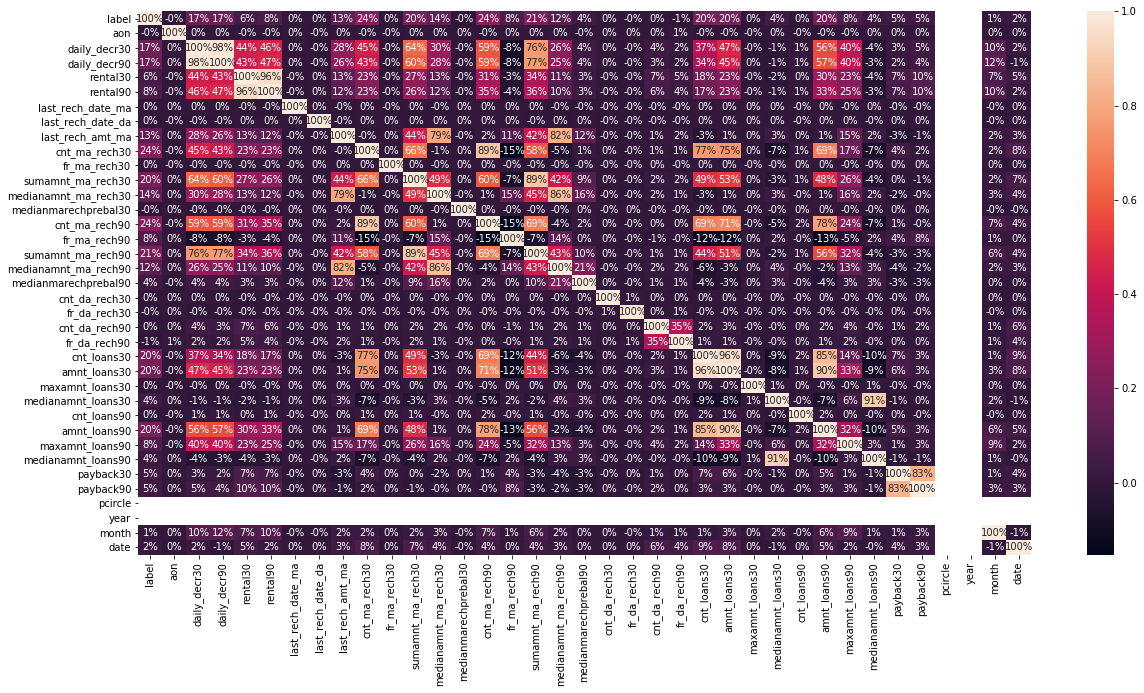

In [147]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset_corr,annot = True, fmt='.0%')
plt.show()

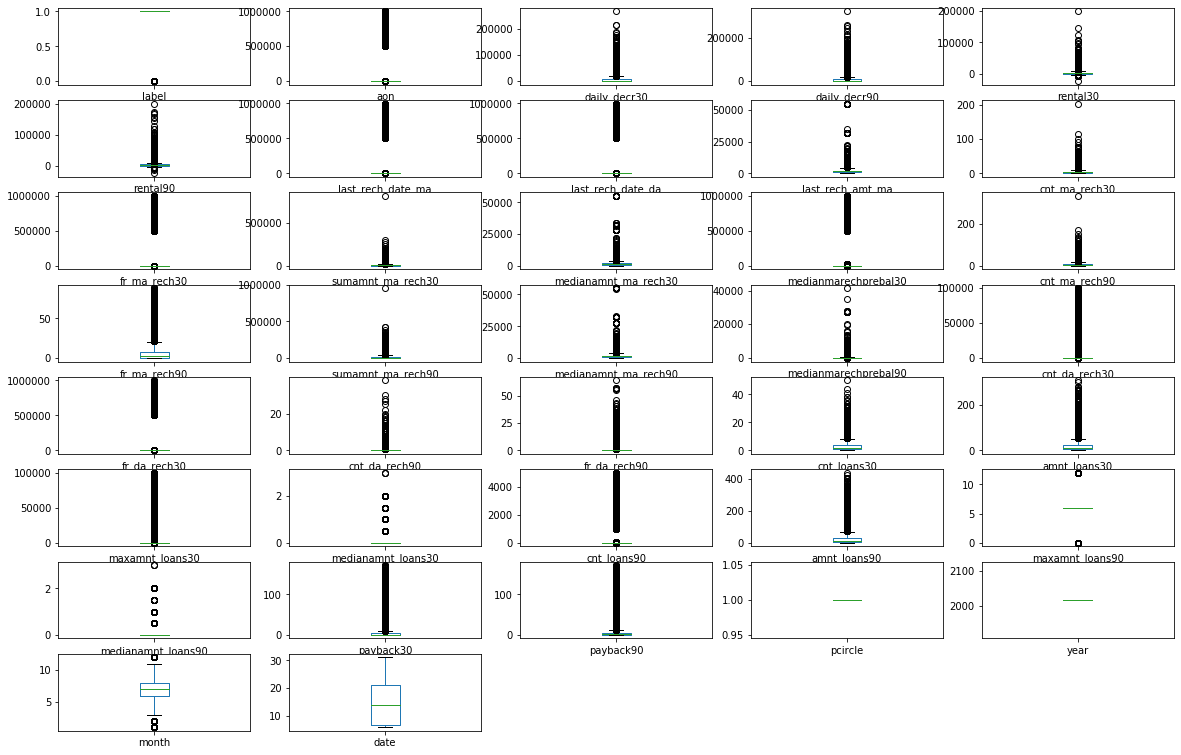

In [148]:
box = dataset.plot(kind = 'box',subplots = True,layout=(9,5),figsize=(20,15))
plt.show()

In [149]:
from scipy.stats import zscore
z = np.abs(zscore(dataset1))
threshold = 3
np.where(z>3)

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64),
 array([15, 15, 32, ..., 28, 26, 30], dtype=int64))

In [150]:
dataset1_new = dataset1[(z<3).all(axis=1)]

In [151]:
dataset1_new

Empty DataFrame
Columns: [label, aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, last_rech_amt_ma, cnt_ma_rech30, fr_ma_rech30, sumamnt_ma_rech30, medianamnt_ma_rech30, medianmarechprebal30, cnt_ma_rech90, fr_ma_rech90, sumamnt_ma_rech90, medianamnt_ma_rech90, medianmarechprebal90, cnt_da_rech30, fr_da_rech30, cnt_da_rech90, fr_da_rech90, cnt_loans30, amnt_loans30, maxamnt_loans30, medianamnt_loans30, cnt_loans90, amnt_loans90, maxamnt_loans90, medianamnt_loans90, payback30, payback90, pcircle, year, month, date]
Index: []

[0 rows x 37 columns]

In [152]:
Q1 = dataset1.quantile(0.25)
Q3 = dataset1.quantile(0.75)
IQR = Q3-Q1
print(IQR)

label                       0.000
aon                       736.000
daily_decr30             7201.560
daily_decr90             7760.098
rental30                 3076.520
rental90                 3901.530
last_rech_date_ma           6.000
last_rech_date_da           0.000
last_rech_amt_ma         1539.000
cnt_ma_rech30               4.000
fr_ma_rech30                6.000
sumamnt_ma_rech30        8470.000
medianamnt_ma_rech30     1154.000
medianmarechprebal30       72.000
cnt_ma_rech90               6.000
fr_ma_rech90                8.000
sumamnt_ma_rech90       13683.000
medianamnt_ma_rech90     1151.000
medianmarechprebal90       64.710
cnt_da_rech30               0.000
fr_da_rech30                0.000
cnt_da_rech90               0.000
fr_da_rech90                0.000
cnt_loans30                 3.000
amnt_loans30               18.000
maxamnt_loans30             0.000
medianamnt_loans30          0.000
cnt_loans90                 4.000
amnt_loans90               24.000
maxamnt_loans9

In [153]:
dataset1_new1= dataset1[~((dataset1<(Q1-1.5*IQR)) | (dataset1>(Q3>1.5*IQR))).any(axis=1)]

In [154]:
dataset1_new1.shape

(0, 37)

In [155]:
dataset1_new1.head()

Empty DataFrame
Columns: [label, aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, last_rech_amt_ma, cnt_ma_rech30, fr_ma_rech30, sumamnt_ma_rech30, medianamnt_ma_rech30, medianmarechprebal30, cnt_ma_rech90, fr_ma_rech90, sumamnt_ma_rech90, medianamnt_ma_rech90, medianmarechprebal90, cnt_da_rech30, fr_da_rech30, cnt_da_rech90, fr_da_rech90, cnt_loans30, amnt_loans30, maxamnt_loans30, medianamnt_loans30, cnt_loans90, amnt_loans90, maxamnt_loans90, medianamnt_loans90, payback30, payback90, pcircle, year, month, date]
Index: []

[0 rows x 37 columns]

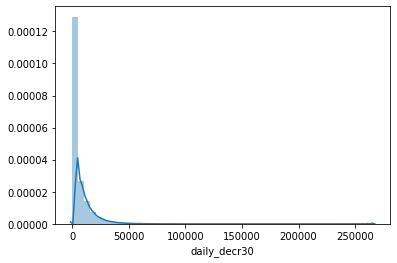

In [156]:
sns.distplot(dataset['daily_decr30'])

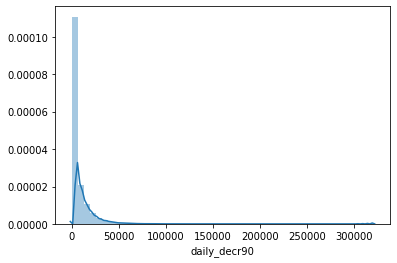

In [157]:
sns.distplot(dataset['daily_decr90'])

In [158]:
hist_plot=dataset.hist(linewidth=1.5,figsize=(20,20))
hist_plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259A2A8B4C8>,
      dtype=object)

In [159]:
dataset.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

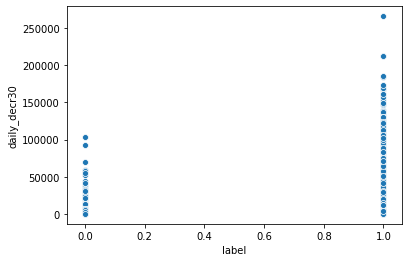

In [160]:
# Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

sns.scatterplot(x='label',y='daily_decr30',data = dataset)

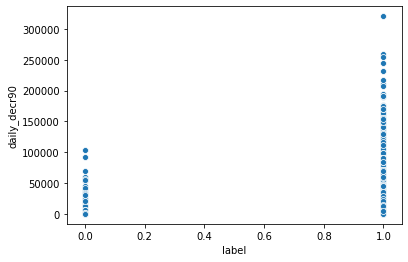

In [161]:
# Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

sns.scatterplot(x='label',y='daily_decr90',data = dataset)

In [162]:
# Average payback time in days over last 30 days

sns.scatterplot(x='label',y ='payback30',data = dataset)

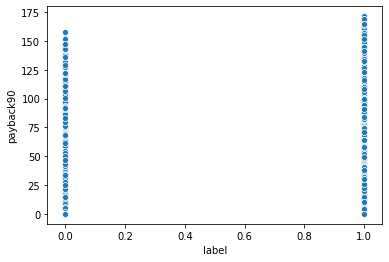

In [163]:
# Average payback time in days over last 90 days

sns.scatterplot(x='label',y ='payback90',data = dataset)

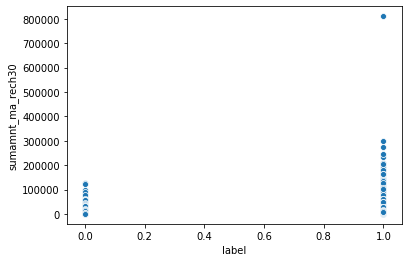

In [164]:
# Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

sns.scatterplot(x='label',y ='sumamnt_ma_rech30',data = dataset)

In [165]:
dataset['sumamnt_ma_rech30'].idxmax()

26468

In [166]:
dataset['sumamnt_ma_rech30'].iloc[26468] 

810096.0

In [167]:
dataset['sumamnt_ma_rech30'].median()

4628.0

In [168]:
dataset['sumamnt_ma_rech30'].iloc[26468] = 4268

In [169]:
dataset['sumamnt_ma_rech30'].iloc[26468]

4268.0

In [170]:
# Total amount of recharge in main account over last 90 days (in Indonesian Rupiah)

sns.scatterplot(x='label',y ='sumamnt_ma_rech90',data = dataset)

In [171]:
dataset['sumamnt_ma_rech90'].idxmax()

26468

In [172]:
dataset['sumamnt_ma_rech90'].iloc[26468]

953036

In [173]:
dataset['sumamnt_ma_rech90'].median()

7226.0

In [174]:
dataset['sumamnt_ma_rech90'].iloc[26468] = 7226

In [175]:
dataset['sumamnt_ma_rech90'].iloc[26468]

7226

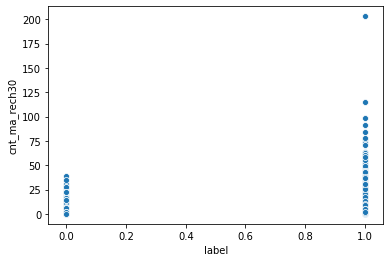

In [176]:
# Number of times main account got recharged in last 30 days

sns.scatterplot(x='label',y='cnt_ma_rech30',data = dataset)

In [177]:
dataset['cnt_ma_rech30'].idxmax()

157784

In [178]:
dataset['cnt_ma_rech30'].iloc[157784]

203

In [179]:
dataset['cnt_ma_rech30'].median()

3.0

In [180]:
dataset['cnt_ma_rech30'].iloc[157784] = 3

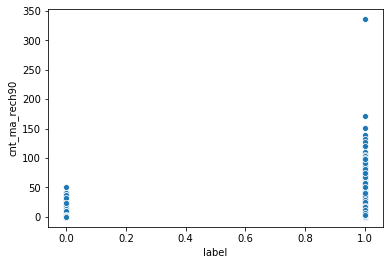

In [181]:
# Number of times main account got recharged in last 90 days

sns.scatterplot(x='label',y='cnt_ma_rech90',data = dataset)

In [182]:
dataset['cnt_ma_rech90'].idxmax()

157784

In [183]:
dataset['cnt_ma_rech90'].iloc[157784]

336

In [184]:
dataset['cnt_ma_rech90'].median()

4.0

In [185]:
dataset['cnt_ma_rech90'].iloc[157784]= 4

In [186]:
# Number of loans taken by user in last 30 days
sns.scatterplot(x='label',y='cnt_loans30',data = dataset)

In [187]:
dataset['cnt_loans30'].idxmax()

124650

In [188]:
dataset['cnt_loans30'].iloc[2233]

12

In [189]:
dataset['cnt_loans30'].median()

2.0

In [190]:
dataset['cnt_loans30'].value_counts()

1     83432
2     42665
3     27050
4     17499
5     11673
6      7773
7      5041
8      3384
0      3259
9      2273
10     1571
11     1143
12      793
13      547
14      383
15      270
16      213
17      164
18       98
19       77
20       54
21       45
22       42
23       38
25       19
26       17
27       15
24       13
29        9
31        8
28        7
30        4
32        4
33        3
38        2
41        1
44        1
36        1
35        1
50        1
Name: cnt_loans30, dtype: int64

In [191]:
# Number of loans taken by user in last 90 days

sns.scatterplot(x='label',y='cnt_loans90',data = dataset)

In [192]:
dataset['cnt_loans90'].median()

2.0

In [193]:
dataset['cnt_loans90'].value_counts()

1.000000       73862
2.000000       37286
3.000000       23986
4.000000       16761
5.000000       12331
               ...  
2869.580125        1
2218.225624        1
3096.002080        1
2893.258858        1
3479.417395        1
Name: cnt_loans90, Length: 1110, dtype: int64

In [194]:
dataset['cnt_loans90'].value_counts().head(30)


1.0     73862
2.0     37286
3.0     23986
4.0     16761
5.0     12331
6.0      9367
7.0      7076
8.0      5347
9.0      4222
10.0     3224
11.0     2572
0.0      2036
12.0     2007
13.0     1583
14.0     1247
15.0     1038
16.0      817
17.0      671
18.0      536
19.0      424
20.0      363
21.0      298
22.0      277
23.0      212
24.0      181
25.0      133
26.0      119
27.0       94
28.0       74
30.0       61
Name: cnt_loans90, dtype: int64

In [195]:
dataset.shape

(209593, 38)

In [196]:
dataset.loc[dataset['cnt_loans90'] > 12] = 1

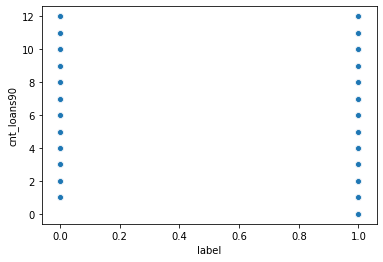

In [197]:
sns.scatterplot(x='label',y='cnt_loans90',data = dataset)

###  Building the model

In [200]:
x = dataset.drop(['label','msisdn'],axis =1)
y = dataset['label']

In [201]:
x_train,x_test,y_train,y_test =train_test_split( x,y,test_size =.3,random_state= 42)

In [202]:
print(x_train.shape,'\t\t',x_test.shape)

(146715, 36) 		 (62878, 36)


In [203]:
print(y_train.shape,'\t\t',y_test.shape)

(146715,) 		 (62878,)


In [204]:
from sklearn.preprocessing import StandardScaler
stdsc= StandardScaler()
x = stdsc.fit_transform(x)

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

In [206]:
model= [LogisticRegression(),GaussianNB(),RandomForestClassifier(),DecisionTreeClassifier()]

for m in model:
    
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('Accuracy score of ',m,'is: ')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print('******************************************************************')
    print('\n')
    

Accuracy score of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is: 
0.8754731384586024
[[   30  7801]
 [   29 55018]]
******************************************************************


Accuracy score of  GaussianNB(priors=None, var_smoothing=1e-09) is: 
0.5005566334807087
[[ 7256   575]
 [30829 24218]]
******************************************************************


Accuracy score of  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_l

In [207]:
# Cross Validating The Model

models = [LogisticRegression(),GaussianNB(),RandomForestClassifier(),DecisionTreeClassifier()]

for m in models:
    score = cross_val_score(m,x,y,cv = 10,scoring = 'accuracy')
    print('Model:',m)
    print('Score : ',score)
    print('Mean Score: ',score.mean())
    print('Standard deviation: ',score.std())
    
    print('***************************************************')
    print('\n')

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Score :  [0.87686069 0.87795802 0.87695611 0.87823847 0.87842931 0.8768071
 0.87699795 0.87728422 0.87728422 0.87752278]
Mean Score:  0.8774338862788819
Standard deviation:  0.0005572586215850857
***************************************************


Model: GaussianNB(priors=None, var_smoothing=1e-09)
Score :  [0.50357824 0.50477099 0.50429389 0.50551076 0.50441338 0.5072284
 0.50636958 0.51004342 0.50479508 0.50999571]
Mean Score:  0.5060999444480663
Standard deviation:  0.0021989835090107037
***************************************************


Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='g

### From above cross validation score and accuracy scores of models it is clear that Random Forest Classifier have done the process in good manner

### In RandomForestClassifier, the accuracy score is 0.9208626228569611


### And crossvalidation score is 0.9217912928603974

### Since crossvalidation score and accuracy score are almost same.This model is the good approach

In [214]:
# Hyper parameter using RnadomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [211]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predr = rfc.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,predr))

Accuracy score: 0.9207035847196158


In [215]:
grid = {'max_depth':[3,5,10,None],
       'n_estimators':[100,200,300,400,500],
       'max_features':randint(1,3),
       'criterion':['gini','entropy'],
       'min_samples_leaf':randint(1,4)}

In [216]:
rdm_search_cv = RandomizedSearchCV(rfc,param_distributions=grid,
                                   scoring = 'accuracy',
                                  n_jobs=-1)

In [217]:
rdm_search_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [218]:
rdm_search_cv.best_score_

0.9195787751763623

In [219]:
rdm_search_cv.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 1,
 'n_estimators': 200}

#### As the cross validation score and randomizedsearchcv score are nearly the same.We take the parameters of the cross validation score as it is a little bit higher than randomizedsearchcv.

In [221]:
# Saving the RandomForestClassifier model
from sklearn.externals import joblib
joblib.dump(rfc,'micro_credit.pkl')

['micro_credit.pkl']